In [1]:
zf
import filterpy

In [14]:
class iKFcontrol():
    def __init__(self,_f,_h,_A,_B,_C,_x,_P,_Q,_R,_t):
        self.f=_f
        self.h=_h
        self.A=_A
        self.B=_B
        self.C=_C
        self.curr_state_est=_x
        self.curr_prob_est=_P
        self.Q=_Q
        self.R=_R
        self.t=_t
        self.pred_state_est=_x
        self.pred_prob_est=_P
    
    def getCurrentState(self):
        return self.curr_state_est
    
    def predict(self,control_vec):
        self.pred_state_est=self.f(self.curr_state_est,control_vec,self.t,0)
        self.pred_prob_est=np.dot(self.A,np.dot(self.curr_prob_est,self.A.T))+self.Q
        
    def correct(self,meas_vect):
        self.innov=meas_vect-self.h(self.curr_state_est,self.t,0)
        self.innov_cov=np.dot(np.dot(self.C.T,self.pred_prob_est),self.C)+self.R
        k_gain=np.dot(self.pred_prob_est,self.C.T)*1/self.innov_cov
        self.curr_state_est = self.pred_state_est + k_gain*self.innov
        n=self.curr_prob_est.shape[0]
        self.curr_prob_est=np.dot(np.eye(n)-np.dot(k_gain,self.C),self.pred_prob_est)
        

class EKFcontrol():
    def __init__(self,_f,_h,_A,_B,_C,_x,_P,_Q,_R,_t):
        self.f=_f
        self.h=_h
        self.A=_A
        self.B=_B
        self.C=_C
        self.curr_state_est=_x
        self.curr_prob_est=_P
        self.Q=_Q
        self.R=_R
        self.t=_t
        self.pred_state_est=_x
        self.pred_prob_est=_P
    
    def getCurrentState(self):
        return self.curr_state_est
    
    def predict(self,control_vec):
        self.pred_state_est=self.f(self.curr_state_est,control_vec,self.t,0)
        self.pred_prob_est=np.dot(self.A,np.dot(self.curr_prob_est,self.A.T))+self.Q
        
    def correct(self,meas_vect):
        self.innov = meas_vect - self.h(self.pred_state_est, self.t, 0)
        self.innov_cov = np.dot(np.dot(self.C.T, self.pred_prob_est), self.C) + self.R
        k_gain = np.dot(self.pred_prob_est, self.C.T) * 1 / self.innov_cov
        self.curr_state_est = self.pred_state_est + k_gain * self.innov
        n=1 if isinstance(self.curr_prob_est,int) else self.curr_prob_est.shape[0]
        self.curr_prob_est = np.dot(np.eye(n) - np.dot(k_gain, self.C), self.pred_prob_est)

def f1(x,control_vec,t,w):
    return x

def h1(x,t,v):
    return 1/(1+np.exp(-x*t))

def h1der(x,t,v):
    return h1(x,t,v)*(1-h1(x,t,v))*t

def h2(x,t,v):
    return np.sin(x*t)

def h2der(x,t,v):
    return np.cos(x*t)*t

class pop:
    def __init__(self,_f,_h,_x,_R,_t,control_vec, _A, _B):
        self.f=_f
        self.h=_h
        self.A=_A
        self.B=_B
#         self.C=_C
        #self.curr_state_est=_x
        #self.curr_prob_est=_P
        #self.Q=_Q
        self.x=_x
        self.R=_R
        self.t=_t
        self.control_vec=control_vec
        self.xs=[]
        
    def step(self):
#         self.x=self.f(self.x,self.control_vec,self.t,0)
        self.x = np.dot(self.A,self.x)+(self.B*self.control_vec)
        self.xs.append(self.x)
    
    def getY(self):
        return self.h(self.x,self.t,0)
    
    def getNoiseY(self):
        return random.gauss(self.getY(),np.sqrt(self.R))

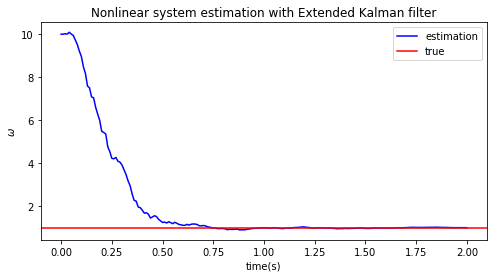

In [46]:
N=201
dt=0.01
x0=10
x=1
P=np.array([1])
A=np.array([1])
B=np.array([1])
C=np.array([h1der(x0,0,0)])
Q=np.array([0])
R=np.array([0.01])
control_vec=0
control_vec_vec = np.array([control_vec])
t = 0
P = np.array([1])

EKF=EKFcontrol(f1,h1,A,B,C,x0,P,Q,R,0)
pop_=pop(f1,h1,x,R,0,control_vec, A, B)

measuredpop=[]
truepop=[]
kalman=[]



for i in range(N):
    pop_.t=i*dt
    EKF.t=i*dt
    measured = pop_.getNoiseY()
    measuredpop.append(measured)
    truepop.append(pop_.getY())
    kalman.append(EKF.getCurrentState())
    EKF.predict(control_vec)
    C=np.array([h1der(EKF.pred_state_est,i*dt,0)])
#     print C
    EKF.C=C
    EKF.correct(measured)
    pop_.step()
    
    
    
kal=np.asarray(kalman)
plt.figure(figsize=(8,4))
plt.plot(np.arange(N)*dt,kal,'b')
plt.axhline(y=1,color='r')
plt.legend(('estimation','true'))
plt.xlabel('time(s)')
plt.ylabel(r'$\omega$')
plt.title(r'Nonlinear system estimation with Extended Kalman filter')
plt.show()

try a normal KF?

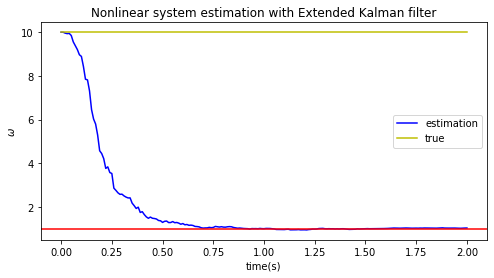

In [96]:
from filterpy.kalman import KalmanFilter

# kf = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
# kf.x = np.array([[x0]])
# kf.F = np.array([A])
# kf.B = np.array([B])
# kf.H = np.array([C])
# kf.R = R
# kf.Q = Q
# kf.P = P

kf = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
numsteps = 80


kf.x = np.array([[x0]])
kf.F = np.array([A])
kf.B=np.array([[1]])
kf.H=np.array([[h1der(x0,0,0)]])
kf.Q=np.array([[0]])
kf.R=np.array([[0.01]])
# kf.B = np.array([B])
# kf.H = np.array([C])
# kf.R = np.array([R])
# kf.Q = np.array([Q])
# kf.P = P

EKF=EKFcontrol(f1,h1,A,B,C,x0,P,Q,R,0)
dt=0.01
measuredpop=[]
truepop=[]
kalman=[]

basic_kalman = []

for i in range(N):
    pop_.t=i*dt
    EKF.t=i*dt
    measured = pop_.getNoiseY()
    measuredpop.append(measured)
    truepop.append(pop_.getY())
    kalman.append(EKF.getCurrentState())
    EKF.predict(control_vec)
    C=np.array([h1der(EKF.pred_state_est,i*dt,0)])
#     print C
    EKF.C=C
    EKF.correct(measured)
    
    
    #### basic kf
    kf.predict(control_vec_vec) 
    measure_vec = np.matrix(measured)

    kf.update(measured)
    x = kf.x
    res =kf.y
    basic_kalman.append(x[0])
    
    ####
    
    pop_.step()

    
kal=np.asarray(kalman)

plt.figure(figsize=(8,4))
plt.plot(np.arange(N)*dt,kal,'b')
plt.plot(np.arange(N)*dt,basic_kalman,'y')
plt.axhline(y=1,color='r')
plt.legend(('estimation','true'))
plt.xlabel('time(s)')
plt.ylabel(r'$\omega$')
plt.title(r'Nonlinear system estimation with Extended Kalman filter')
plt.show()

What about UKF?

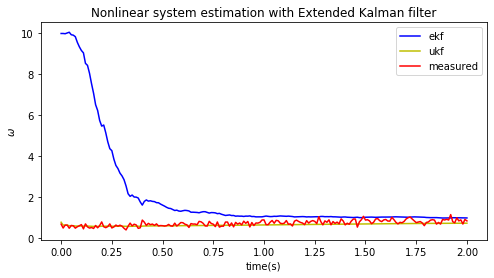

In [110]:
from filterpy.kalman import UnscentedKalmanFilter

from filterpy.kalman import MerweScaledSigmaPoints
def fx_ukf(x, dt):
    return np.dot(np.array([A]), x)

def hx_ukf(x):
    return x
points = MerweScaledSigmaPoints(1, alpha=1e-3, beta=2., kappa=0)
ukf = UnscentedKalmanFilter(dim_x=1, dim_z=1, dt = dt, fx = fx_ukf, hx = hx_ukf, points = points)


ukf.x = np.array([[x0]])
ukf.P = 1
# ukf.F = np.array([A])
# ukf.B=np.array([[1]])
# ukf.H=np.array([[h1der(x0,0,0)]])
ukf.Q=np.array([Q])
ukf.R=np.array([R])



EKF=EKFcontrol(f1,h1,A,B,C,x0,P,Q,R,0)
dt=0.01
measuredpop=[]
truepop=[]
kalman=[]

u_kalman = []

for i in range(N):
    pop_.t=i*dt
    EKF.t=i*dt
    measured = pop_.getNoiseY()
    measuredpop.append(measured)
    truepop.append(pop_.getY())
    kalman.append(EKF.getCurrentState())
    EKF.predict(control_vec)
    C=np.array([h1der(EKF.pred_state_est,i*dt,0)])
#     print C
    EKF.C=C
    EKF.correct(measured)
    
    
    #### basic kf
    ukf.predict(control_vec_vec)
    measure_vec = np.matrix(measured)

    ukf.update(measured)
    x = ukf.x
    res =ukf.y
    u_kalman.append(x[0])
    
    ####
    
    pop_.step()

    
kal=np.asarray(kalman)

plt.figure(figsize=(8,4))
plt.plot(np.arange(N)*dt,kal,'b')
plt.plot(np.arange(N)*dt,u_kalman,'y')
plt.plot(np.arange(N)*dt,measuredpop,'r')
plt.legend(('ekf','ukf', 'measured'))
plt.xlabel('time(s)')
plt.ylabel(r'$\omega$')
plt.title(r'Nonlinear system estimation with Extended Kalman filter')
plt.show()

[[0.98005685]]
[[0.87252734]]
[[0.72349437]]
[[0.65713937]]
[[0.70727846]]
[[0.46107034]]
[[0.33169715]]
[[0.21239131]]
[[0.14809822]]
[[0.10815558]]
[[0.10522993]]
[[0.26131197]]
[[0.24986388]]
[[0.3427979]]
[[0.32692785]]
[[0.25047348]]
[[0.07016427]]
[[0.18624693]]
[[0.30744596]]
[[0.23489044]]
[[0.71078883]]
[[1.00963857]]
[[1.3818719]]
[[1.78829747]]
[[1.9352709]]
[[2.00053775]]
[[2.25296651]]
[[2.39555104]]
[[2.40616824]]
[[2.72035588]]
[[2.84115046]]
[[2.98641516]]
[[3.02383717]]
[[2.81742214]]
[[3.02729225]]
[[3.1061298]]
[[2.83244077]]
[[2.97825045]]
[[3.02976174]]
[[3.108839]]
[[3.04452298]]
[[3.03233185]]
[[2.89368228]]
[[2.92067706]]
[[3.07337078]]
[[3.07004494]]
[[3.03835182]]
[[3.06442813]]
[[3.03010286]]
[[2.92415586]]
[[3.14771374]]
[[2.98876966]]
[[2.91010874]]
[[2.88578067]]
[[2.86481748]]
[[2.93162881]]
[[2.98745657]]
[[2.98407484]]
[[2.94144685]]
[[2.73594]]
[[2.44154122]]
[[2.06450072]]
[[1.79012388]]
[[1.74637271]]
[[1.38696295]]
[[1.23196287]]
[[1.03626824]]
[[0.

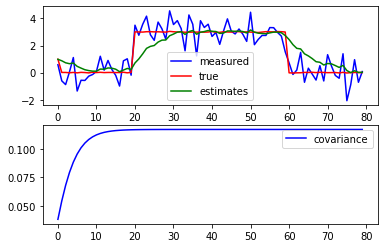

In [82]:

my_filter = KalmanFilter(dim_x=1, dim_z=1, dim_u=1)
numsteps = 80
f = my_filter
init_state = 1.
f.x = np.array([[init_state]])
f.F = np.array([[1]])
f.H = np.array([[1]])
# covariance matrix
state_noise = 0.02
f.P = state_noise
# measurement noise
measure_noise = 0.8
f.R = np.array([[measure_noise]])  
# state uncertainty
f.Q = np.array([[state_noise]])
# control inputs
controls = np.array([0]*1 + [0]*19 + [3]*40 + [0]*20)
# get true states
true_states = np.zeros(numsteps)
true_states[0] = init_state 
true_states += controls
# state noise
true_states += np.random.normal(0, state_noise, numsteps)
# measurements
measurements = [(s + np.random.normal(0, measure_noise)) for s in true_states]
all_obs = []
estimates = []
num_obs = numsteps
covs = []
for n in range(num_obs):
    my_filter.predict(u=controls[n])
    mmm = measurements[n]
#     print(mmm)
    my_filter.update(mmm)
    x = my_filter.x
    print(x)
    res = my_filter.y
    estimates.append(x[0])
    covs.append(my_filter.P[0])

measurements = np.array(measurements)
estimates = np.array(estimates)
# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(num_obs), measurements, 'b')
plt.plot(range(num_obs), true_states, 'r')
plt.plot(range(num_obs), estimates, 'g')
plt.legend(('measured', 'true', 'estimates'))
plt.subplot(2,1,2)
plt.plot(range(num_obs), covs, 'b')
plt.legend(('covariance',))
plt.show()

JPDAFILTER tracks n object using joint probabilistic data
       association
       
       INPUT: obj: an instantiation of n_objectracker class
             states: structure array of size (1, number of objects)
             with two fields: 
                      x: object initial state mean --- (object state
                      dimension) x 1 vector 
                      P: object initial state covariance --- (object
                      state dimension) x (object state dimension)
                      matrix  
             Z: cell array of size (total tracking time, 1), each
             cell stores measurements of size (measurement
             dimension) x (number of measurements at corresponding
             time step)  
                         
             
       OUTPUT:estimates: cell array of size (total tracking time, 1),
             each cell stores estimated object state of size (object
             state dimension) x (number of objects)
       
       STEPS FOR JPDA
       1. implement ellipsoidal gating for each local hypothesis seperately;
       2. construct 2D cost matrix of size (number of objects, number of measurements that at least fall inside the gates + number of objects);
       3. find the M best assignment matrices using a M-best 2D assignment solver;
       4. normalise the weights of different data association hypotheses;
       5. prune assignment matrices that correspond to data association hypotheses with low weights and renormalise the weights;
       6. create new local hypotheses for each of the data association results;
       7. merge local hypotheses that correspond to the same object by moment matching;
       8. extract object state estimates;
       9. predict each local hypothesis.
       
       number of time steps

In [ ]:
JPDAfilter(tracker, initial_state, measdata, sensor_model, motion_model, meas_model);
JPDAfilter(obj    , states        , Z      , sensormodel , motionmodel , measmodel)


  % measurements at time t=k
            z = Z{k};
            % number of measurements
            mk = size(z,2);

            % 1. implement ellipsoidal gating for each predicted local hypothesis seperately, see Note below for details; 
            idx_z_ingate = zeros(n,mk);
            for i=1:n
                [~, idx_z_ingate(i,:)] = obj.density.ellipsoidalGating(states(i), z, measmodel, obj.gating.size);
            end
            % 1.1 disconsider measurements that do not fall inside any object gates
            idx_keep = sum(idx_z_ingate,1) > 0;
            z = z(:,idx_keep);
            idx_z_ingate = idx_z_ingate(:,idx_keep);
            mk = sum(idx_keep);

            % 2. construct 2D cost matrix of size (number of objects, number of measurements that at least fall inside the gates + number of objects);
            L = inf(n,mk+n);
            for i=1:n
                for j = find(idx_z_ingate(i,:))
                    S_i_h    = measmodel.H(states(i).x) * states(i).P * measmodel.H(states(i).x).';
                    zbar_i_h = measmodel.h(states(i).x);
                    L(i,j) = -( log(sensormodel.P_D/sensormodel.intensity_c) ...
                                 -1/2*log(det(2*pi*S_i_h)) ...
                                 -1/2*(z(:,j) - zbar_i_h).' / S_i_h * (z(:,j) - zbar_i_h)  );
                end
                L(i,mk+i) = - log(1-sensormodel.P_D);
            end

            % 3. find the best assignment matrix using a 2D assignment solver (Murty's algorithm);
            M = obj.reduction.M;    % number of hypothesis at each step
            [Theta,~,gain] = kBest2DAssign(L,M);
            M = length(gain);       % there might be not enough hypothesis available
            assert( all(gain~=-1), 'Assignment problem is unfeasible');

            % 3.1 calculate weight for each hypothesis
            log_w = zeros(M,1);
            for iM =1:M
                tr_AL = sum(L(sub2ind(size(L),1:n,Theta(:,iM)')));     % same as trace(A'*L)
                % exp(-trace(A'*L)) gives in abs, but we want to keep w in log scale
                % this is equal to multiply each selected weights
                log_w(iM) = -tr_AL;    
            end
            Theta( Theta > mk ) = mk+1; % set misdetection hypothesis to index = mk+1

            % 4. normalise the weights of different data association hypotheses;
            log_w = normalizeLogWeights(log_w);

            % 5. prune assignment matrices that correspond to data association hypotheses with low 
                             weights and renormalise the weights;
            hyp = 1:M;  % indices for hypothesis (each column in col4row is one hypothesis)
            [log_w, hyp] = hypothesisReduction.prune( log_w, hyp, obj.reduction.w_min );
            % remove pruned hypothesis
            Theta = Theta(:,hyp);       % each column is a hypothesis
            log_w = normalizeLogWeights(log_w);


            % 6. create new local hypotheses for each of the data association results;
            beta = zeros(n,mk+1);   % marg. prob that a object i=1:n is associated to meas. j=0:m
            for i=1:n
                for i_Theta = 1:size(Theta,2)
                    j = Theta(i,i_Theta);      % j=1 means ass. to meas. 1, j=mk+1 means misdetection
                    beta(i,j) = beta(i,j) + exp( log_w(i_Theta)  );
                end
            end
            % sanity check: sum of beta over j = 1 (each row should sum 1)

            % 7. merge local hypotheses that correspond to the same object by moment matching;  
            for i=1:n
                P_pred = states(i).P;
                x_pred = states(i).x;
                H = measmodel.H(x_pred);
                S = H * P_pred * H' + measmodel.R;
                K = P_pred * H' / S;
                ksi_ij = cell(mk,1);            % innovation mean
                ksi_i  = zeros(size(z,1),1);    % expected innovation for each object
                aux    = zeros(size(z,1),size(z,1));
                for j=1:mk
                    ksi_ij{j} = z(:,j) - measmodel.h( x_pred );
                    ksi_i = ksi_i + beta(i,j) * ksi_ij{j};
                    aux = aux + beta(i,j) * ksi_ij{j} * ksi_ij{j}';
                end
                % update mean
                states(i).x = x_pred + K * ksi_i;
                states(i).P = beta(i,mk+1) * P_pred + ...
                              (1 - beta(i,mk+1)) * P_pred - K * S * K' + ...
                              K * ( aux - ksi_i*ksi_i' ) * K';
            end

            % 8. extract object state estimates;
            for i=1:n
                estimates_x{k}(:,i) = states(i).x;
                estimates_P{k}(:,:,i) = states(i).P;
            end

            % 9. predict each local hypothesis.
            states = arrayfun(@(s) obj.density.predict(s,motionmodel), states );